In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns
import random

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

from sklearn.model_selection import train_test_split #para dividir los datos
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

from functools import reduce

In [2]:
# Cargar Data
df_clientes = pd.read_csv('Input1_clientes_estructura.csv',  sep=';')
df_ventas = pd.read_csv('Input2_clientes_venta.csv',  sep=';')
df_respuesta = pd.read_csv('Input3_clientes_test.csv',  sep=';')

# Describir data
print(df_clientes.describe(include='all'))

             Cliente   Regional2    Gerencia2   SubCanal2    Categoria  \
count   20921.000000       20921        20921       20921        20921   
unique           NaN           1           11          32            6   
top              NaN  Regional 1  Gerencia_10  Subcanal_3  Categoria_2   
freq             NaN       20921         5441        8217         8773   
mean    10461.000000         NaN          NaN         NaN          NaN   
std      6039.516827         NaN          NaN         NaN          NaN   
min         1.000000         NaN          NaN         NaN          NaN   
25%      5231.000000         NaN          NaN         NaN          NaN   
50%     10461.000000         NaN          NaN         NaN          NaN   
75%     15691.000000         NaN          NaN         NaN          NaN   
max     20921.000000         NaN          NaN         NaN          NaN   

              Nevera  
count   20921.000000  
unique           NaN  
top              NaN  
freq             Na

# Análisis exploratorio

In [3]:
df_clientes.head()

,Cliente,Regional2,Gerencia2,SubCanal2,Categoria,Nevera
0,1,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,0
1,2,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,0
2,3,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,0
3,4,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,1
4,5,Regional 1,Gerencia_1,Subcanal_1,Categoria_2,1


In [4]:
regions = df_clientes['Regional2'].unique()
managements = df_clientes['Gerencia2'].unique()
subchannels = df_clientes['SubCanal2'].unique()
categories = df_clientes['Categoria'].unique()


print(f'Cantidad Regiones: {len(regions)}')
print(f'Cantidad Gerencias: {len(managements)}')
print(f'Cantidad SubCanales: {len(subchannels)}')
print(f'Cantidad Categorías: {len(categories)}')

Cantidad Regiones: 1
Cantidad Gerencias: 11
Cantidad SubCanales: 32
Cantidad Categorías: 6


##### Región no es relevante para el modelo

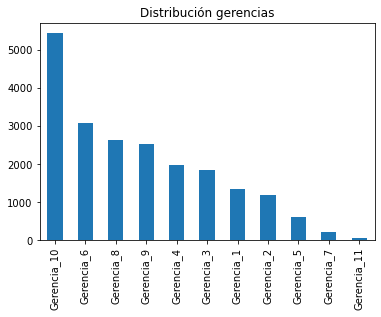

In [5]:
df_clientes.Gerencia2.value_counts().plot(kind = 'bar')
plt.title('Distribución gerencias')
plt.show()

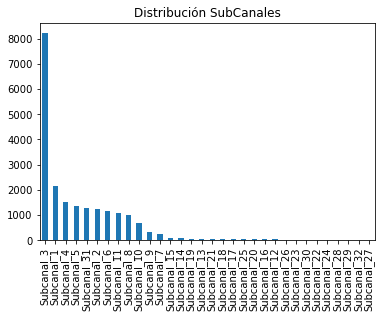

In [6]:
df_clientes.SubCanal2.value_counts().plot(kind = 'bar')
plt.title('Distribución SubCanales')
plt.show()

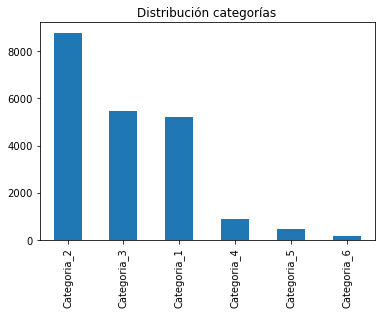

In [7]:
df_clientes.Categoria.value_counts().plot(kind = 'bar')
plt.title('Distribución categorías')
plt.show()

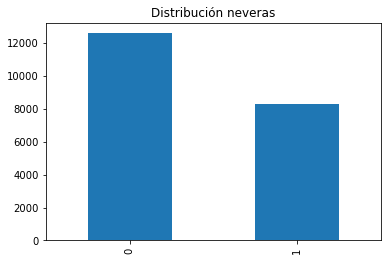

In [8]:
df_clientes.Nevera.value_counts().plot(kind = 'bar')
plt.title('Distribución neveras')
plt.show()

In [9]:
df_ventas.head()

,Año,Mes,Cliente,SegmentoPrecio2,Marca2,Cupo2,CapacidadEnvase2,Volumen,disc,nr
0,2019,5,10,SegmentoPrecio_1,Marca_1,Cupo_1,CapacidadEnvase_12,0.112229,-30.590603,900.328567
1,2019,5,10,SegmentoPrecio_1,Marca_2,Cupo_2,CapacidadEnvase_10,0.021734,0.000000,149.184463
2,2019,5,10,SegmentoPrecio_2,Marca_3,Cupo_2,CapacidadEnvase_10,0.043469,0.000000,359.625828
3,2019,5,10,SegmentoPrecio_1,Marca_1,Cupo_2,CapacidadEnvase_16,0.026345,-31.065261,134.748399
4,2019,5,10,SegmentoPrecio_1,Marca_4,Cupo_2,CapacidadEnvase_10,0.086938,0.000000,496.901005


In [10]:
segments = df_ventas['SegmentoPrecio2'].unique()
brands = df_ventas['Marca2'].unique()
quotas = df_ventas['Cupo2'].unique()
capacity = df_ventas['CapacidadEnvase2'].unique()


print(f'Cantidad Segmentos: {len(segments)}')
print(f'Cantidad Marcas: {len(brands)}')
print(f'Cantidad Cupos: {len(quotas)}')
print(f'Cantidad Capacidades envases: {len(capacity)}')

Cantidad Segmentos: 3
Cantidad Marcas: 39
Cantidad Cupos: 5
Cantidad Capacidades envases: 17


In [ ]:
df_ventas_cuant = df_ventas.loc[:, ['Volumen', 'disc', 'nr']]
pd.plotting.scatter_matrix(df_ventas_cuant);

In [11]:
df_menor=df_ventas.loc[:, ['Volumen', 'disc', 'nr']]
correlation_mat = df_menor.corr()
correlation_mat

,Volumen,disc,nr
Volumen,1.000000,-0.646511,0.981551
disc,-0.646511,1.000000,-0.601817
nr,0.981551,-0.601817,1.000000


# Transformación información

In [12]:
# Unir DataFrames ventas y clientes
df_historico = pd.merge(df_clientes, df_ventas, how='right', left_on='Cliente', right_on='Cliente' )
df_historico

,Cliente,Regional2,Gerencia2,SubCanal2,Categoria,Nevera,Año,Mes,SegmentoPrecio2,Marca2,Cupo2,CapacidadEnvase2,Volumen,disc,nr
0,1,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,0,2020,4,SegmentoPrecio_1,Marca_2,Cupo_2,CapacidadEnvase_10,0.021734,0.000000,177.808470
1,1,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,0,2020,5,SegmentoPrecio_1,Marca_4,Cupo_2,CapacidadEnvase_10,0.108672,0.000000,756.931758
2,1,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,0,2020,6,SegmentoPrecio_1,Marca_4,Cupo_2,CapacidadEnvase_10,0.152141,-181.925298,878.706990
3,1,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,0,2020,7,SegmentoPrecio_1,Marca_4,Cupo_2,CapacidadEnvase_10,0.043469,-51.978688,251.059077
4,1,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,0,2020,2,SegmentoPrecio_1,Marca_4,Cupo_2,CapacidadEnvase_10,0.195610,-176.808635,1174.935733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1406111,20577,Regional 1,Gerencia_8,Subcanal_3,Categoria_2,0,2020,8,SegmentoPrecio_3,Marca_39,Cupo_2,CapacidadEnvase_10,0.039122,0.000000,544.150314
1406112,20580,Regional 1,Gerencia_10,Subcanal_5,Categoria_6,0,2020,7,SegmentoPrecio_1,Marca_38,Cupo_2,CapacidadEnvase_10,0.000000,0.000000,0.000000
1406113,20580,Regional 1,Gerencia_10,Subcanal_5,Categoria_6,0,2020,7,SegmentoPrecio_3,Marca_39,Cupo_2,CapacidadEnvase_10,0.058683,0.000000,759.218996
1406114,20580,Regional 1,Gerencia_10,Subcanal_5,Categoria_6,0,2020,9,SegmentoPrecio_1,Marca_38,Cupo_2,CapacidadEnvase_10,0.000000,0.000000,0.000000


In [13]:
# Agregar columna para evaluar compra
df_historico['Compra'] = np.where(df_historico['Volumen']>0, 1, 0)

# Concatenar atributos producto
df_historico['Producto']= df_historico['Marca2']+' '+df_historico['Cupo2']+' '+df_historico['CapacidadEnvase2']

df_historico.head()

,Cliente,Regional2,Gerencia2,SubCanal2,Categoria,Nevera,Año,Mes,SegmentoPrecio2,Marca2,Cupo2,CapacidadEnvase2,Volumen,disc,nr,Compra,Producto
0,1,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,0,2020,4,SegmentoPrecio_1,Marca_2,Cupo_2,CapacidadEnvase_10,0.021734,0.000000,177.808470,1,Marca_2 Cupo_2 CapacidadEnvase_10
1,1,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,0,2020,5,SegmentoPrecio_1,Marca_4,Cupo_2,CapacidadEnvase_10,0.108672,0.000000,756.931758,1,Marca_4 Cupo_2 CapacidadEnvase_10
2,1,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,0,2020,6,SegmentoPrecio_1,Marca_4,Cupo_2,CapacidadEnvase_10,0.152141,-181.925298,878.706990,1,Marca_4 Cupo_2 CapacidadEnvase_10
3,1,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,0,2020,7,SegmentoPrecio_1,Marca_4,Cupo_2,CapacidadEnvase_10,0.043469,-51.978688,251.059077,1,Marca_4 Cupo_2 CapacidadEnvase_10
4,1,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,0,2020,2,SegmentoPrecio_1,Marca_4,Cupo_2,CapacidadEnvase_10,0.195610,-176.808635,1174.935733,1,Marca_4 Cupo_2 CapacidadEnvase_10


In [14]:
# Limpiando DataFrame. Quitando columnas no necesarias o duplicadas

df_historico_limpio = df_historico.copy()
df_historico_limpio = df_historico.loc[:, ['Cliente', 'Gerencia2', 'SubCanal2', 'Categoria','Nevera', 'Producto', 'Compra']]
df_historico_limpio

,Cliente,Gerencia2,SubCanal2,Categoria,Nevera,Producto,Compra
0,1,Gerencia_1,Subcanal_1,Categoria_1,0,Marca_2 Cupo_2 CapacidadEnvase_10,1
1,1,Gerencia_1,Subcanal_1,Categoria_1,0,Marca_4 Cupo_2 CapacidadEnvase_10,1
2,1,Gerencia_1,Subcanal_1,Categoria_1,0,Marca_4 Cupo_2 CapacidadEnvase_10,1
3,1,Gerencia_1,Subcanal_1,Categoria_1,0,Marca_4 Cupo_2 CapacidadEnvase_10,1
4,1,Gerencia_1,Subcanal_1,Categoria_1,0,Marca_4 Cupo_2 CapacidadEnvase_10,1
...,...,...,...,...,...,...,...
1406111,20577,Gerencia_8,Subcanal_3,Categoria_2,0,Marca_39 Cupo_2 CapacidadEnvase_10,1
1406112,20580,Gerencia_10,Subcanal_5,Categoria_6,0,Marca_38 Cupo_2 CapacidadEnvase_10,0
1406113,20580,Gerencia_10,Subcanal_5,Categoria_6,0,Marca_39 Cupo_2 CapacidadEnvase_10,1
1406114,20580,Gerencia_10,Subcanal_5,Categoria_6,0,Marca_38 Cupo_2 CapacidadEnvase_10,0


In [15]:
# Renombrando productos para identificar productos output
dict_productos = {'Marca_20 Cupo_3 CapacidadEnvase_9': 'Marca1',
      'Marca_16 Cupo_2 CapacidadEnvase_10':'Marca2',
      'Marca_9 Cupo_3 CapacidadEnvase_12': 'Marca3',
      'Marca_38 Cupo_2 CapacidadEnvase_10': 'Marca_Inno1',
      'Marca_39 Cupo_2 CapacidadEnvase_10': 'Marca_Inno2'}

df_historico_limpio['Producto'] = df_historico_limpio['Producto'].map(dict_productos).fillna(df_historico_limpio['Producto'])
df_historico_limpio

,Cliente,Gerencia2,SubCanal2,Categoria,Nevera,Producto,Compra
0,1,Gerencia_1,Subcanal_1,Categoria_1,0,Marca_2 Cupo_2 CapacidadEnvase_10,1
1,1,Gerencia_1,Subcanal_1,Categoria_1,0,Marca_4 Cupo_2 CapacidadEnvase_10,1
2,1,Gerencia_1,Subcanal_1,Categoria_1,0,Marca_4 Cupo_2 CapacidadEnvase_10,1
3,1,Gerencia_1,Subcanal_1,Categoria_1,0,Marca_4 Cupo_2 CapacidadEnvase_10,1
4,1,Gerencia_1,Subcanal_1,Categoria_1,0,Marca_4 Cupo_2 CapacidadEnvase_10,1
...,...,...,...,...,...,...,...
1406111,20577,Gerencia_8,Subcanal_3,Categoria_2,0,Marca_Inno2,1
1406112,20580,Gerencia_10,Subcanal_5,Categoria_6,0,Marca_Inno1,0
1406113,20580,Gerencia_10,Subcanal_5,Categoria_6,0,Marca_Inno2,1
1406114,20580,Gerencia_10,Subcanal_5,Categoria_6,0,Marca_Inno1,0


In [16]:
# Convertir DataFrame a línea por cliente
df_historico_clientes = df_historico_limpio.groupby(['Cliente', 'Gerencia2', 'SubCanal2', 'Categoria', 'Nevera', 'Producto']).count().unstack().Compra
df_historico_clientes

,,,,Producto,Marca1,Marca2,Marca3,Marca_1 Cupo_1 CapacidadEnvase_12,Marca_1 Cupo_1 CapacidadEnvase_14,Marca_1 Cupo_1 CapacidadEnvase_6,Marca_1 Cupo_2 CapacidadEnvase_10,Marca_1 Cupo_2 CapacidadEnvase_16,Marca_1 Cupo_2 CapacidadEnvase_17,Marca_1 Cupo_2 CapacidadEnvase_5,...,Marca_7 Cupo_3 CapacidadEnvase_5,Marca_7 Cupo_3 CapacidadEnvase_8,Marca_8 Cupo_1 CapacidadEnvase_6,Marca_8 Cupo_2 CapacidadEnvase_10,Marca_8 Cupo_3 CapacidadEnvase_1,Marca_8 Cupo_3 CapacidadEnvase_10,Marca_9 Cupo_3 CapacidadEnvase_15,Marca_9 Cupo_3 CapacidadEnvase_3,Marca_Inno1,Marca_Inno2
Cliente,Gerencia2,SubCanal2,Categoria,Nevera,,,,,,,,,,,,,,,,,,,,,
1,Gerencia_1,Subcanal_1,Categoria_1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0
2,Gerencia_1,Subcanal_1,Categoria_1,0,2.0,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
3,Gerencia_1,Subcanal_1,Categoria_1,0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
4,Gerencia_1,Subcanal_1,Categoria_1,1,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0
5,Gerencia_1,Subcanal_1,Categoria_2,1,2.0,NaN,2.0,1.0,NaN,NaN,4.0,5.0,2.0,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,5.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20529,Gerencia_9,Subcanal_4,Categoria_3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0
20567,Gerencia_10,Subcanal_26,Categoria_1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
20569,Gerencia_6,Subcanal_3,Categoria_2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0


In [17]:
# Tratamiento DataFrame y llenado de vacíos

df_historico_clientes.reset_index(drop=False, inplace=True)
df_historico_clientes.fillna(value=0, inplace=True)
df_historico_clientes.rename_axis(None, axis=1, inplace=True)
df_historico_clientes

,Cliente,Gerencia2,SubCanal2,Categoria,Nevera,Marca1,Marca2,Marca3,Marca_1 Cupo_1 CapacidadEnvase_12,Marca_1 Cupo_1 CapacidadEnvase_14,...,Marca_7 Cupo_3 CapacidadEnvase_5,Marca_7 Cupo_3 CapacidadEnvase_8,Marca_8 Cupo_1 CapacidadEnvase_6,Marca_8 Cupo_2 CapacidadEnvase_10,Marca_8 Cupo_3 CapacidadEnvase_1,Marca_8 Cupo_3 CapacidadEnvase_10,Marca_9 Cupo_3 CapacidadEnvase_15,Marca_9 Cupo_3 CapacidadEnvase_3,Marca_Inno1,Marca_Inno2
0,1,Gerencia_1,Subcanal_1,Categoria_1,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
1,2,Gerencia_1,Subcanal_1,Categoria_1,0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,3,Gerencia_1,Subcanal_1,Categoria_1,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,4,Gerencia_1,Subcanal_1,Categoria_1,1,2.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
4,5,Gerencia_1,Subcanal_1,Categoria_2,1,2.0,0.0,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17005,20529,Gerencia_9,Subcanal_4,Categoria_3,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
17006,20567,Gerencia_10,Subcanal_26,Categoria_1,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
17007,20569,Gerencia_6,Subcanal_3,Categoria_2,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
17008,20577,Gerencia_8,Subcanal_3,Categoria_2,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


# Generación modelo

In [20]:
df_marcas = df_historico_clientes.loc[:,col_model]
df_marcas

,Marca1,Marca2,Marca3,Marca_Inno1,Marca_Inno2
0,0.0,0.0,0.0,2.0,2.0
1,2.0,0.0,0.0,1.0,1.0
2,0.0,0.0,0.0,1.0,1.0
3,2.0,0.0,0.0,2.0,2.0
4,2.0,0.0,2.0,0.0,0.0
...,...,...,...,...,...
17005,0.0,0.0,0.0,2.0,2.0
17006,0.0,0.0,0.0,1.0,1.0
17007,0.0,0.0,0.0,1.0,1.0
17008,0.0,0.0,0.0,1.0,1.0


In [18]:
col_categoricas = ['Gerencia2', 'SubCanal2', 'Categoria']
col_model = ['Marca1', 'Marca2', 'Marca3', 'Marca_Inno1', 'Marca_Inno2']

In [21]:
# Asigno valores para x,y

x = df_historico_clientes.iloc[:,1:5].copy()
y = df_marcas.copy()

X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.25, random_state=100)

In [22]:
# Preprocesador sklearn

preprocesado = make_column_transformer((OneHotEncoder(), col_categoricas), remainder='passthrough')


In [23]:
# Predictor RFC
predictor = RandomForestClassifier(random_state=100)

In [ ]:
for i, j in enumerate(col_model):
    print ('Col {}'.format(j))
    
    #Entrenamos
    pipeline = make_pipeline(preprocesado, predictor)
    pipeline.fit(X_train, Y_train.loc[:, j].values) 
    
    

In [24]:
# Creamos el pipeline
pipeline = make_pipeline(preprocesado, predictor)
pipeline.fit(X_train, Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Gerencia2', 'SubCanal2',
                                                   'Categoria'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=100))])

### Resultado del Modelo

In [25]:
df_output = pd.merge(df_clientes, df_respuesta, on='Cliente', how='right')
df_output.drop(['Regional2'], axis=1, inplace=True)
df_output

,Cliente,Gerencia2,SubCanal2,Categoria,Nevera,Marca1,Marca2,Marca3,Marca_Inno1,Marca_Inno2
0,1,Gerencia_1,Subcanal_1,Categoria_1,0,NaN,NaN,NaN,NaN,NaN
1,2,Gerencia_1,Subcanal_1,Categoria_1,0,NaN,NaN,NaN,NaN,NaN
2,3,Gerencia_1,Subcanal_1,Categoria_1,0,NaN,NaN,NaN,NaN,NaN
3,4,Gerencia_1,Subcanal_1,Categoria_1,1,NaN,NaN,NaN,NaN,NaN
4,5,Gerencia_1,Subcanal_1,Categoria_2,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
9297,20411,Gerencia_10,Subcanal_31,Categoria_5,0,NaN,NaN,NaN,NaN,NaN
9298,20414,Gerencia_1,Subcanal_3,Categoria_1,0,NaN,NaN,NaN,NaN,NaN
9299,20434,Gerencia_10,Subcanal_31,Categoria_3,0,NaN,NaN,NaN,NaN,NaN
9300,20462,Gerencia_8,Subcanal_1,Categoria_2,0,NaN,NaN,NaN,NaN,NaN


In [26]:
X_output = df_output.iloc[:,1:5].copy()
X_output

,Gerencia2,SubCanal2,Categoria,Nevera
0,Gerencia_1,Subcanal_1,Categoria_1,0
1,Gerencia_1,Subcanal_1,Categoria_1,0
2,Gerencia_1,Subcanal_1,Categoria_1,0
3,Gerencia_1,Subcanal_1,Categoria_1,1
4,Gerencia_1,Subcanal_1,Categoria_2,1
...,...,...,...,...
9297,Gerencia_10,Subcanal_31,Categoria_5,0
9298,Gerencia_1,Subcanal_3,Categoria_1,0
9299,Gerencia_10,Subcanal_31,Categoria_3,0
9300,Gerencia_8,Subcanal_1,Categoria_2,0


In [27]:
Y_output = pipeline.predict_proba(X_output)

output = []
for cli in range(X_output.shape[0]):
  lista = []
  #print('Cliente', cliente)
  for prod in range(Y_train.shape[1]):
    #print(producto)
    lista.append(1 - (Y_output[prod][cli][0]))
  output.append(lista)
output = np.array(output)
Y_output = pd.DataFrame(output, columns=Y_train.columns)


In [29]:
df_respuesta[col_model] = Y_output[col_model]

In [30]:
df_respuesta.to_csv(path_or_buf='output2.csv', sep=',', index = False)